# EDA

Exploratory Data Analysis (EDA)

In [12]:
import pandas as pd
import numpy as np

from scipy import stats
# pip install scipy

import seaborn as sns
# pip install seaborn
import matplotlib.pyplot as plt

# DATA OVERVIEW

На первом этапе необходимо выгрузить данные и произвести минимальные проверки корректной выгрузки.

Помимо прочего стоит обратить внимание на содержимое в данных, их количество и минимальную статистическую информацию.

In [2]:
df = pd.read_csv('data/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
to_remove = [column for column in df.columns if df[column].isna().sum() / len(df) > 0.33]
to_remove.append('Id')
to_remove

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id']

In [6]:
df_analyze = df.drop(to_remove, axis=1)

In [7]:
df_analyze.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## TARGET DIST INVESTIGATION

Необходимо исследовать целевой признак.

Рассмотрим его распределение.

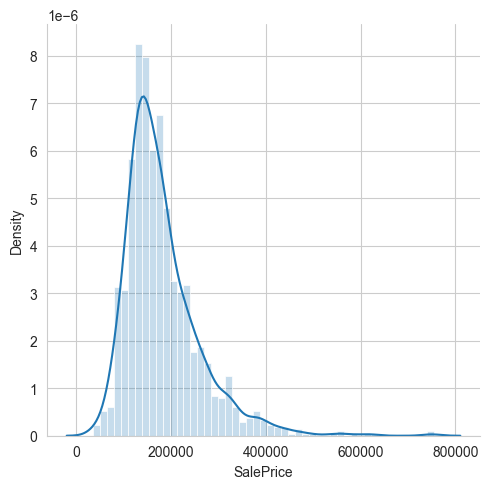

In [10]:
sns.displot(df_analyze['SalePrice'], kde=True, stat='density', kde_kws=dict(cut=3), alpha=0.25)
plt.show()

In [11]:
print(f"Skewness: {df_analyze['SalePrice'].skew()}") # ассимметрия
print(f"Kurtosis: {df_analyze['SalePrice'].kurt()}") # "хвостатость"

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


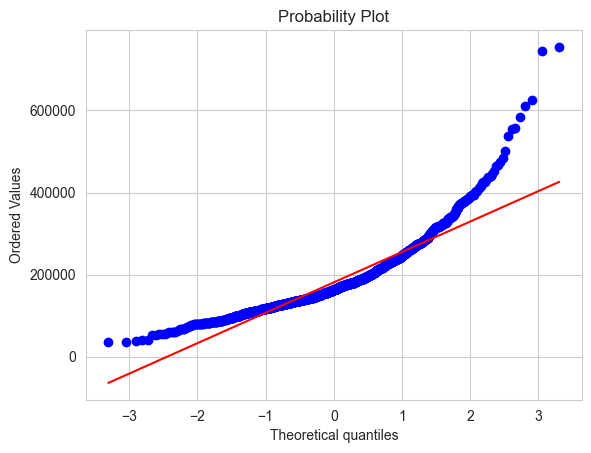

In [13]:
fig = plt.figure()
stats.probplot(df_analyze['SalePrice'], plot=plt)
plt.show()

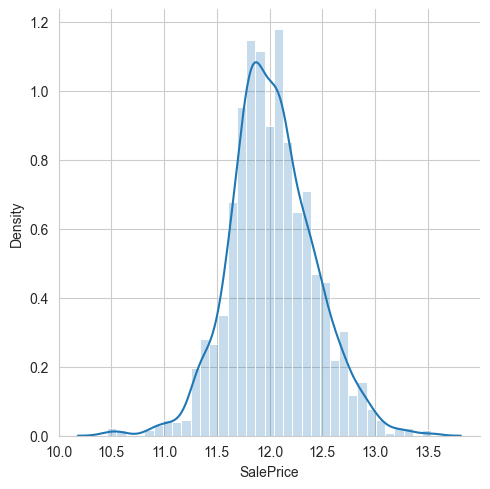

In [14]:
log_sales = np.log1p(df_analyze['SalePrice'])
sns.displot(log_sales, kde=True, stat='density', kde_kws=dict(cut=3), alpha=0.25)
plt.show()

In [15]:
print(log_sales.describe())

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64


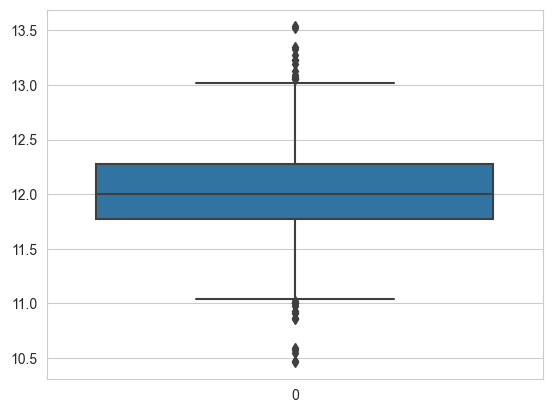

In [16]:
sns.boxplot(log_sales)
plt.show()

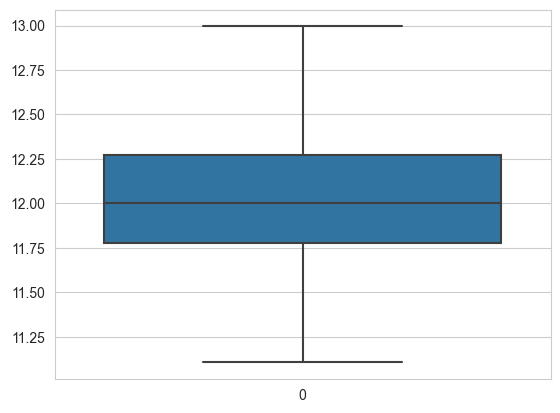

In [18]:
new_log = log_sales[log_sales > 11.1][log_sales < 13]
sns.boxplot(new_log)
plt.show()

In [21]:
print(f"{new_log.count()} vs {log_sales.count()}: {round(100.0 - new_log.count() * 100/ log_sales.count(), 2)}")

1428 vs 1460: 2.19


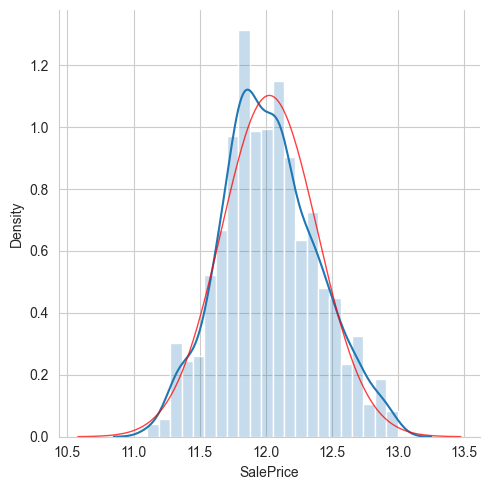

In [26]:
def normal(mean, std, color='red'):
    x = np.linspace(mean - 4 * std, mean + 4 * std, 200)
    p = stats.norm.pdf(x, mean, std)
    plt.plot(x, p, color, linewidth=1, alpha=0.75)

sns.displot(new_log, kde=True, stat='density', kde_kws=dict(cut=3), alpha=0.25)
normal(new_log.mean(), new_log.std())
plt.show()

In [27]:
print(f"Skewness: {new_log.skew()}") # ассимметрия
print(f"Kurtosis: {new_log.kurt()}") # "хвостатость"

Skewness: 0.22499025497823655
Kurtosis: -0.22259137085581893


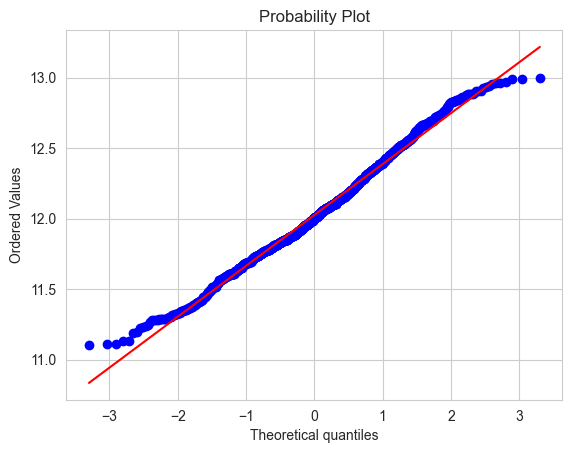

In [28]:
fig = plt.figure()
stats.probplot(new_log, plot=plt)
plt.show()

## NUMERIC DATA

Рассмотрим численные признаки и их взаимосвязи друг с другом и целевой переменной.

In [29]:
df_numeric = df_analyze.select_dtypes(np.number)
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


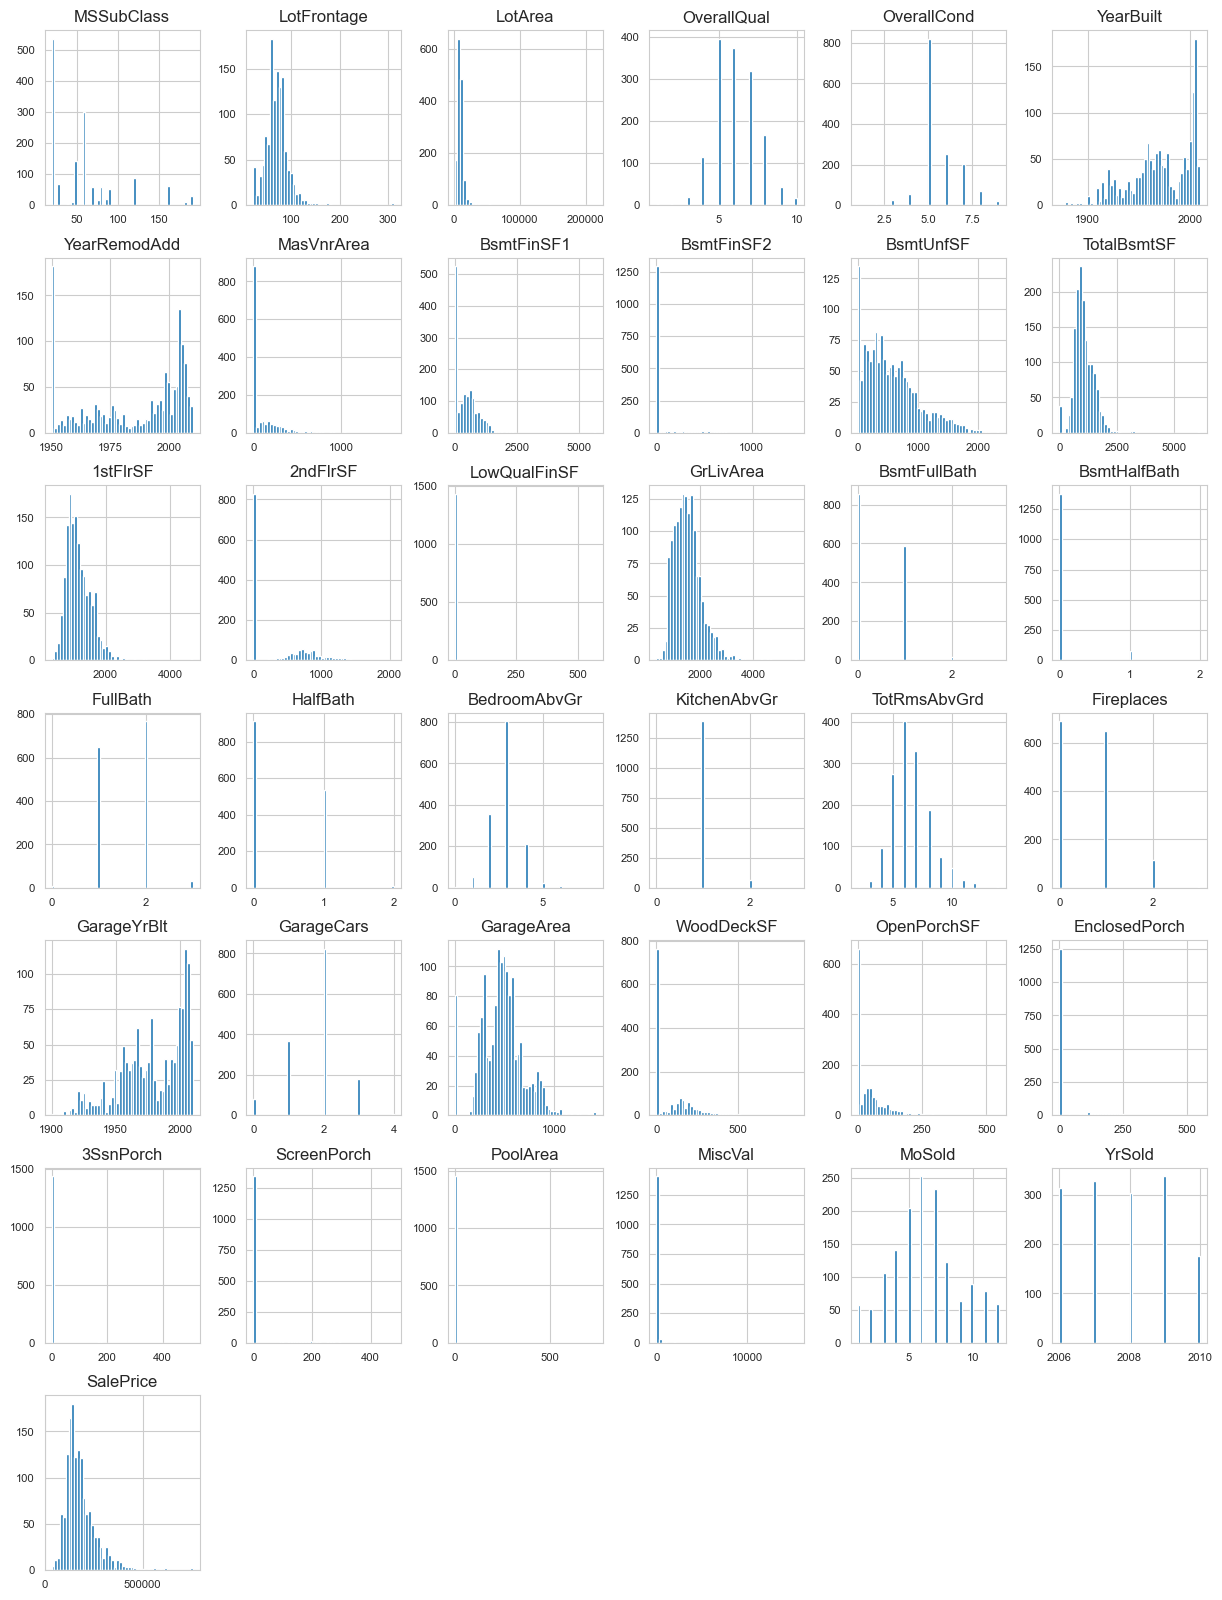

In [30]:
df_numeric.hist(xlabelsize=8, ylabelsize=8, figsize=(15, 20), bins=50)
plt.show()

In [32]:
numeric_corr = df_numeric.corr()['SalePrice'][:-1]

# Фильтруем корреляцию с абсолютным значением > 0.5
high_corr = numeric_corr[abs(numeric_corr) > 0.5].sort_values(ascending=False)
print(high_corr)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


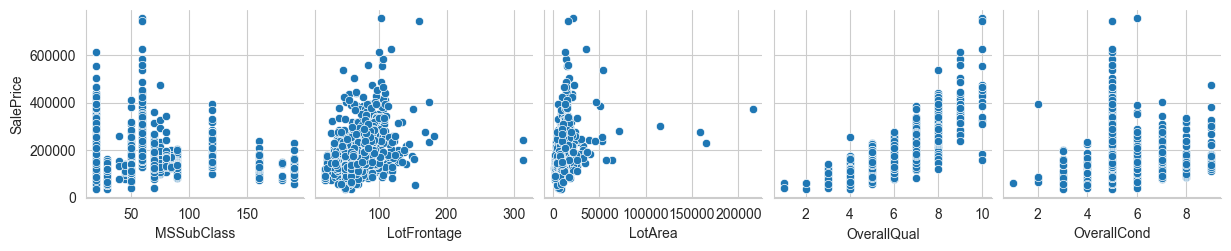

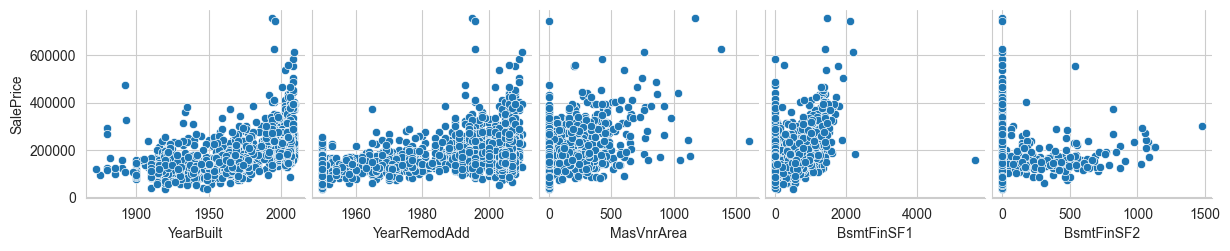

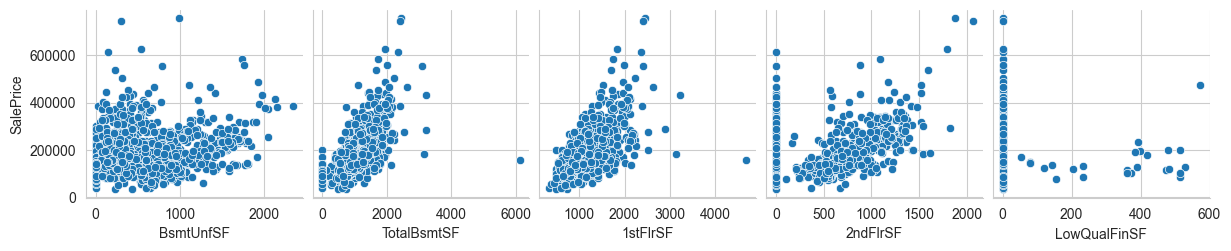

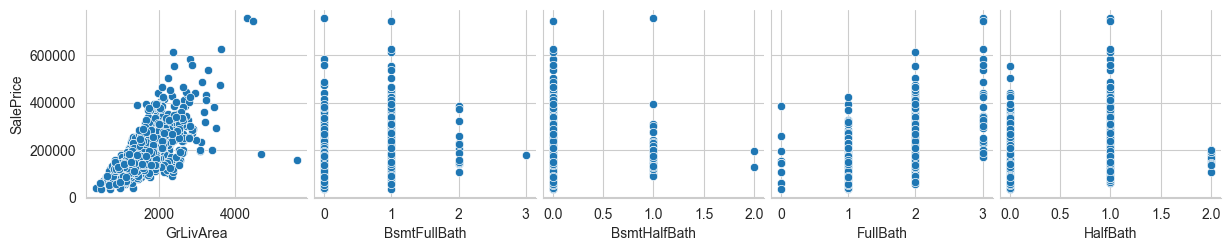

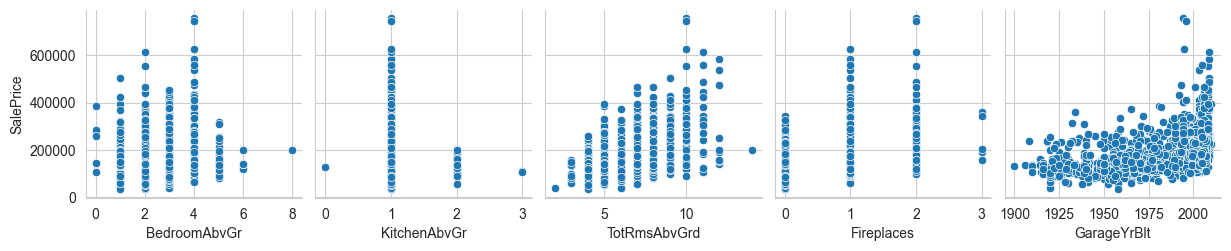

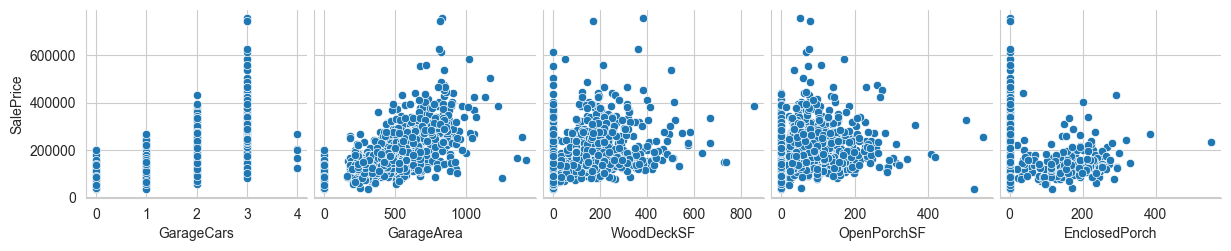

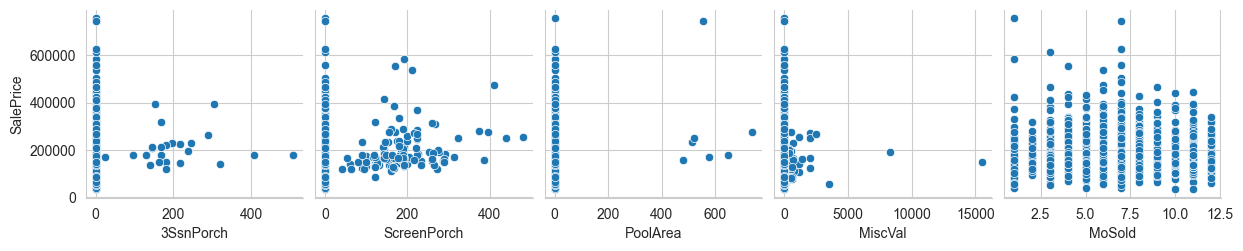

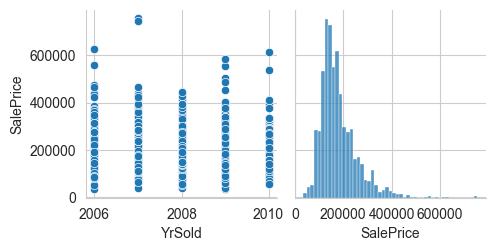

In [33]:
for i in range(0, len(df_numeric.columns), 5):
    sns.pairplot(data=df_numeric, x_vars=df_numeric.columns[i: i+5], y_vars=['SalePrice'])

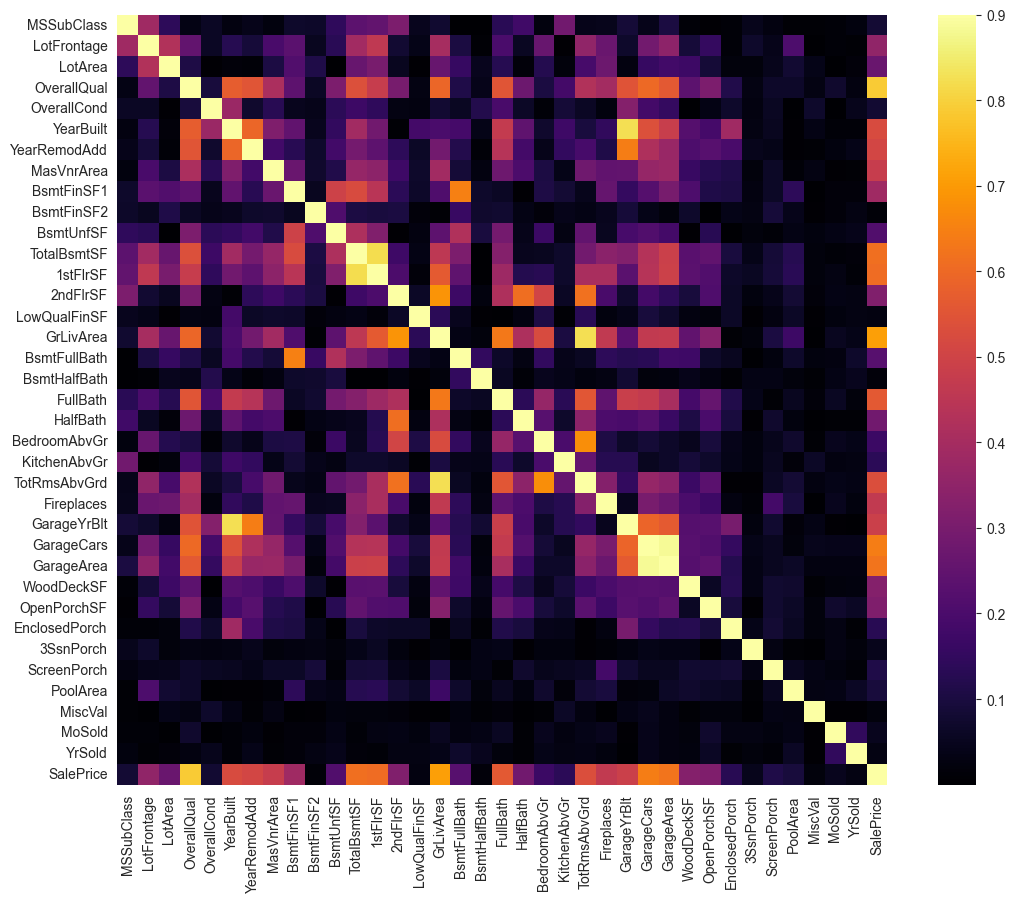

In [35]:
corr = df_numeric.corr()
plt.subplots(figsize=(13, 10))
sns.heatmap(np.abs(corr), vmax=0.9, cmap='inferno', square=True)
plt.show()

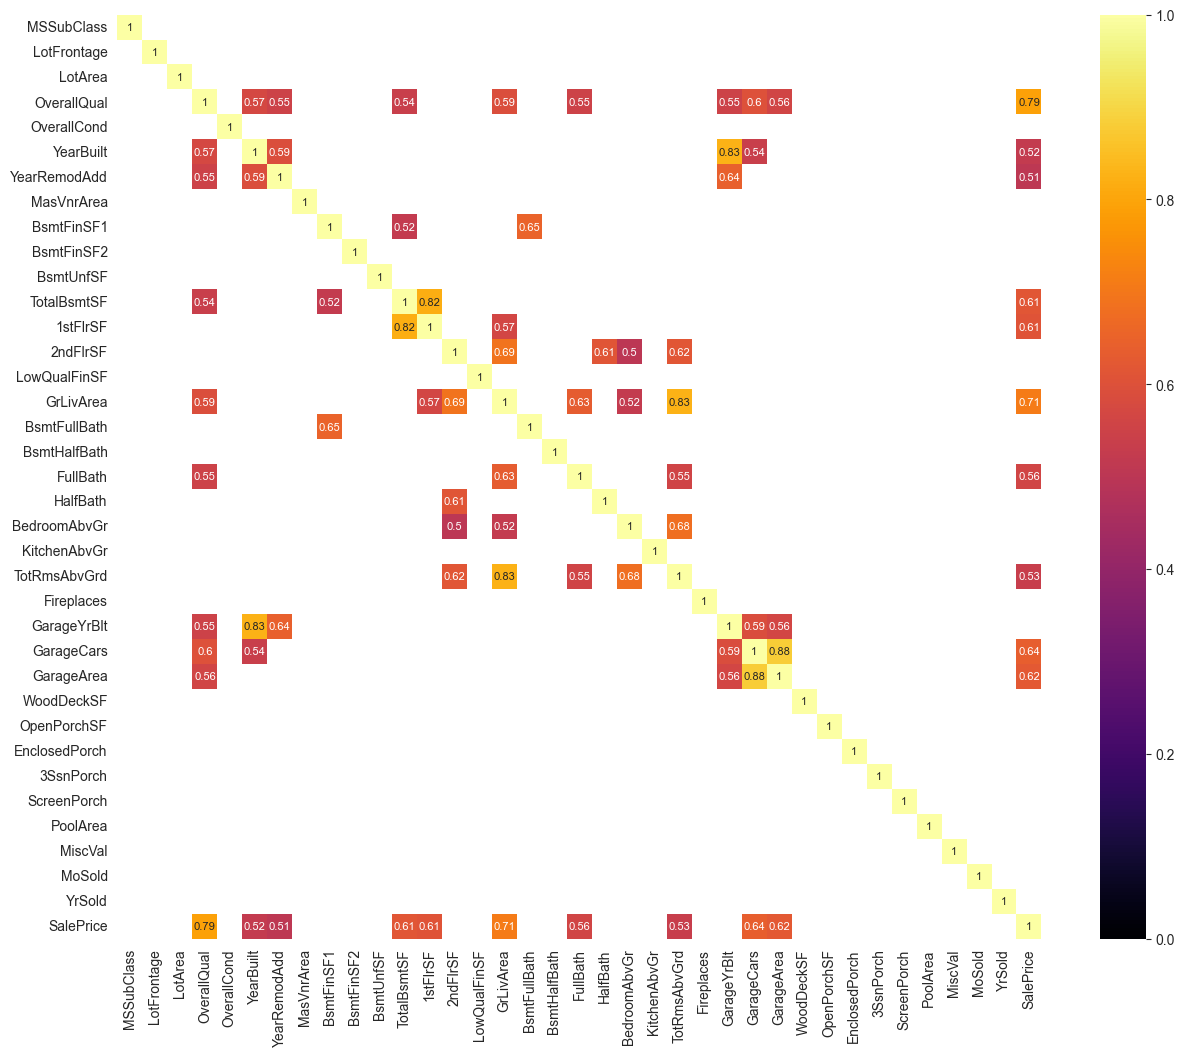

In [36]:
plt.subplots(figsize=(15, 12))
sns.heatmap(
    corr[abs(corr) > 0.5],
    vmax=1.0, vmin=0.0,
    annot=True, annot_kws={'size': 8},
    square=True, cmap='inferno'
)
plt.show()

## CATEGORICAL DATA

Рассмотрим категориальные показатели на предмет данных в них и взаимосвязей.

In [38]:
df_cat = df_analyze.select_dtypes(object)

# Добавим к нашей подвыборке целевой признак.
df_cat['SalePrice'] = df_numeric['SalePrice']
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000


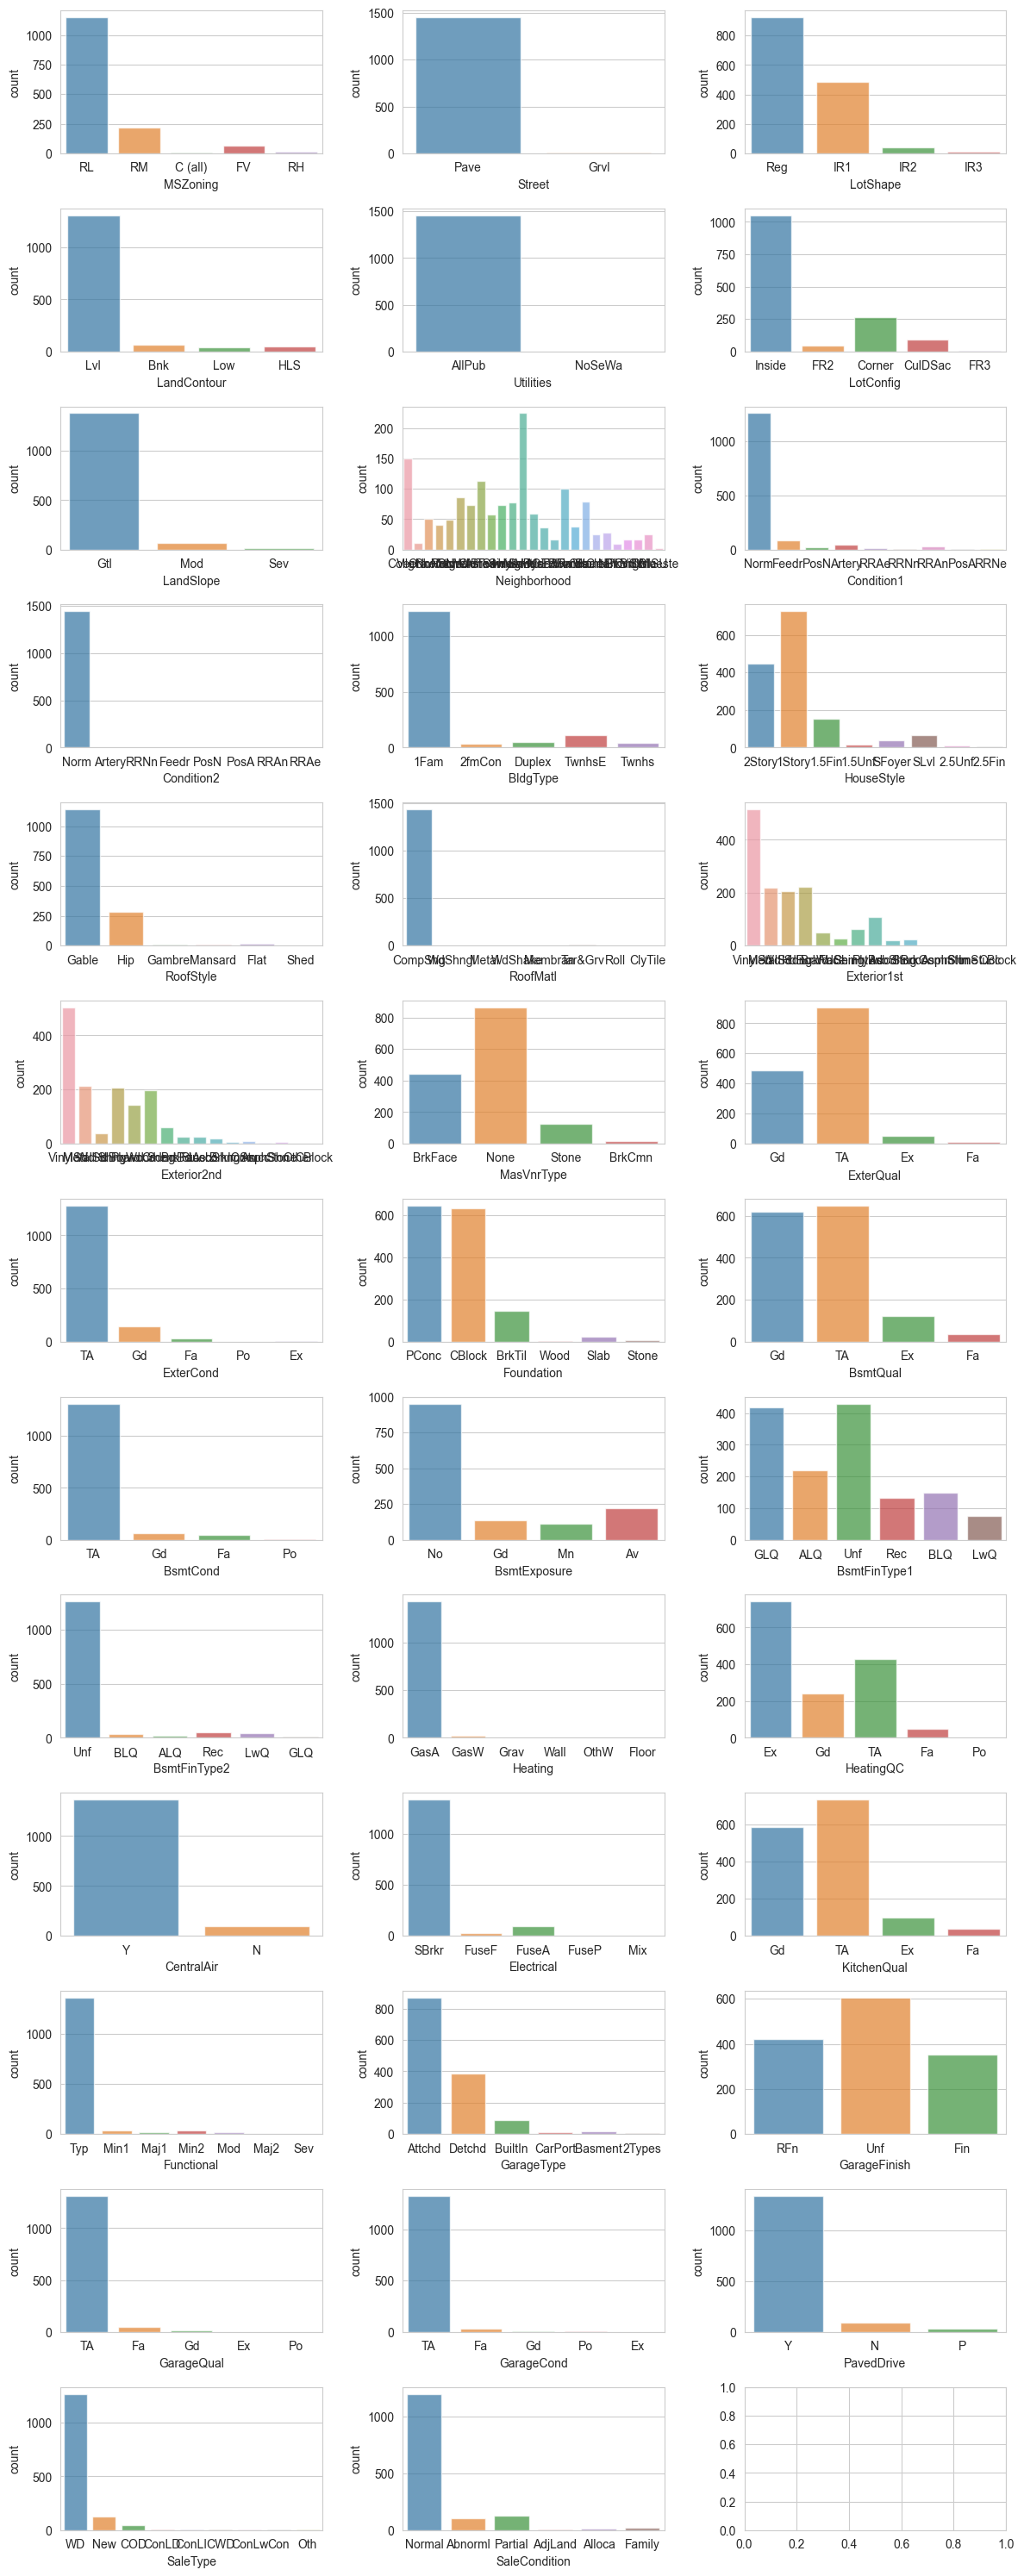

In [39]:
# Отрисуем каждый график переменной в три колонки
fig, axes = plt.subplots(round(len(df_cat.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns) - 1:
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)

fig.tight_layout()

In [42]:
df_cat['SaleCondition'].value_counts(normalize=True)

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64

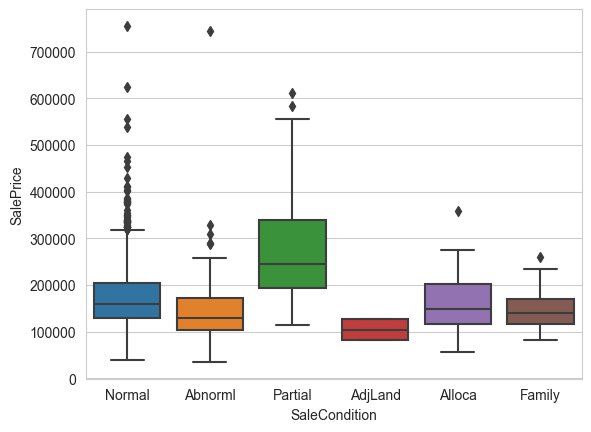

In [43]:
# Отрисуем коробчатую диаграмму в соотношении целевой переменной по выбранному признаку, чтобы увидеть - как хорошо то или иное значение в выбранном признаке описывает целевую переменную.
sns.boxplot(x='SaleCondition', y='SalePrice', data=df_cat)
plt.show()